Reliability Models for Facility Location:The Expected Failure Cost Case
---

Base on the following article:

*Snyder, L. V., & Daskin, M. S. (2005). Reliability models for facility location: the expected failure cost case. Transportation Science, 39(3), 400-416.*

In [83]:
# Colecting the problem
from PythonLib.dataset.mongodb import MongoClient
# Solving the problem
from PythonLib.solvers.uflp import uflp
# Representing the network
from PythonLib.dataviz.network import Network

from sklearn.neighbors import DistanceMetric
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Selecting the problem

First, we collect the dataset from our database using **MonClient**

In [84]:
dataset = MongoClient(db = {
# MongoClient let us connect to the database and manipulate our dataset
    "mongo_host": "ns396089.ip-37-59-38.eu",
    "mongo_port": 32771,
    "mongo_db_name": "NETWORK-AND-DISCRETE-LOCATION"
}, q = {
    'metadata.author': 'Mark S. Daskin',
    'metadata.topic': 'NETWORK-AND-DISCRETE-LOCATION',
    'metadata.dataset': '49-nodes'
},f=None)

We can display the dataset using the method **get** which return a pandas Dataframe containing our data

In [85]:
df = dataset.get()
df.head()

,ID,LATITUDE,LONGITUDE,STATE POP,CITY POP,FIXED COST,CITY
0,1,-121.467360,38.566850,29760021,369365,115800,< Sacramento CA >
1,2,-73.799017,42.665750,17990455,101082,101800,< Albany NY >
2,11,-84.422592,33.762900,6478216,394017,71200,< Atlanta GA >
3,12,-77.474584,37.531050,6187358,203056,66600,< Richmond VA >
4,13,-71.017892,42.336029,6016425,574283,161400,< Boston MA >


## Solving the problem

In [86]:
I = df.index.tolist()
J = df.index.tolist()
f = df["FIXED COST"]
# Distance matrix in Km frm long/lat
c = DistanceMetric.get_metric('haversine').pairwise(df[["LATITUDE","LONGITUDE"]].apply(np.radians))  * 6371

In [87]:
m, X, Y = uflp(I, J, f, c, name='UFLP')

In [88]:
from docplex.mp.environment import Environment
env = Environment()
env.print_information()

* system is: Linux 64bit
* Python is present, version is 3.6.5
* docplex is present, version is (2, 4, 61)
* CPLEX wrapper is present, version is 12.8.0.0, located at: /opt/conda/lib/python3.6/site-packages


In [89]:
m.print_information()

Model: UFLP
 - number of variables: 2450
   - binary=2450, integer=0, continuous=0
 - number of constraints: 2450
   - linear=2450
 - parameters: defaults


In [90]:
#solution = m.solve()

In [91]:
solution.solve_details.time

0.011835813522338867

In [92]:
solution.export("test.json")

In [96]:
X[0,0].solution_value

1.0

## Analyse the probleme and the solution

We use the **dataviz** package to convert our dataset into a **Network** object so that we can plot it.

In [20]:
network = Network(dataset)

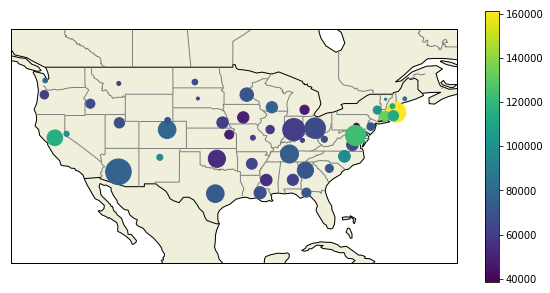

In [21]:
network.plot_nodes(node_size=("CITY POP",1/1500), node_color="FIXED COST")